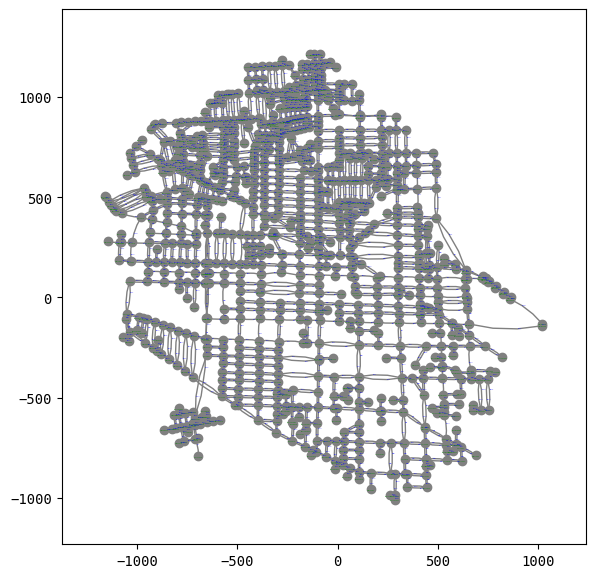

simulation setting:
 scenario name: 
 simulation duration:	 3600 s
 number of vehicles:	 5000 veh
 total road length:	 157593.74700000006 m
 time discret. width:	 5 s
 platoon size:		 5 veh
 number of timesteps:	 720
 number of platoons:	 1000
 number of links:	 2803
 number of nodes:	 1021
 setup time:		 9.89 s
simulating...
      time| # of vehicles| ave speed| computation time
       0 s|        0 vehs|   0.0 m/s|     0.01 s
     600 s|      200 vehs|   3.5 m/s|    22.04 s
    1200 s|      330 vehs|   2.3 m/s|    33.46 s
    1800 s|      455 vehs|   3.1 m/s|    44.82 s
    2400 s|      470 vehs|   3.3 m/s|    56.33 s
    3000 s|      575 vehs|   3.4 m/s|    67.98 s
    3595 s|      580 vehs|   2.5 m/s|    69.23 s
 simulation finished


1

In [11]:
from uxsim import *
import csv
import logging

# logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger(__name__)

SIMULATION_DURATION = 3600


def gen_links_from_csv(W, fname):
    """
    Generate links in the network from a CSV file.

    Parameters
    ----------
    fname : str
        The file name of the CSV file containing link data.
    """
    with open(fname) as f:
        succ = 0
        total = 0
        for r in csv.reader(f):
            if r[3] != "length":
                try:
                    W.addLink(
                        r[0],
                        r[1],
                        r[2],
                        length=float(r[3]),
                        free_flow_speed=float(r[4]),
                        jam_density=float(r[5]),
                        merge_priority=float(r[6]),
                    )
                    succ += 1
                except Exception as e:
                    logger.warn(f"Failed to add link {r},\n\tcause: {e}")
            total += 1
        logger.info(
            f"Imported {succ} links, success rate {succ / total} [{total - succ} fails]"
        )


# Define the main simulation
# Units are standardized to seconds (s) and meters (m)
W = World(
    name="",  # Scenario name
    deltan=5,  # Simulation aggregation unit delta n
    tmax=SIMULATION_DURATION,  # Total simulation time (s)
    print_mode=1,
    save_mode=1,
    show_mode=0,  # Various options
    random_seed=0xBA115,  # Set the random seed
)

W.generate_Nodes_from_csv("osm/map_nodes.csv")
gen_links_from_csv(W, "osm/map_edges.csv")

W.show_network(network_font_size=1)

W.adddemand_area2area(
    -830,
    760,
    1,
    27,
    -875,
    0.05,
    0,
    3600,
    volume=5000,
)

W.exec_simulation()

In [12]:
W.name = "savia"

In [13]:
W.analyzer.network_anim(timestep_skip=2, network_font_size=1)

 generating animation...


  0%|          | 0/30 [00:00<?, ?it/s]

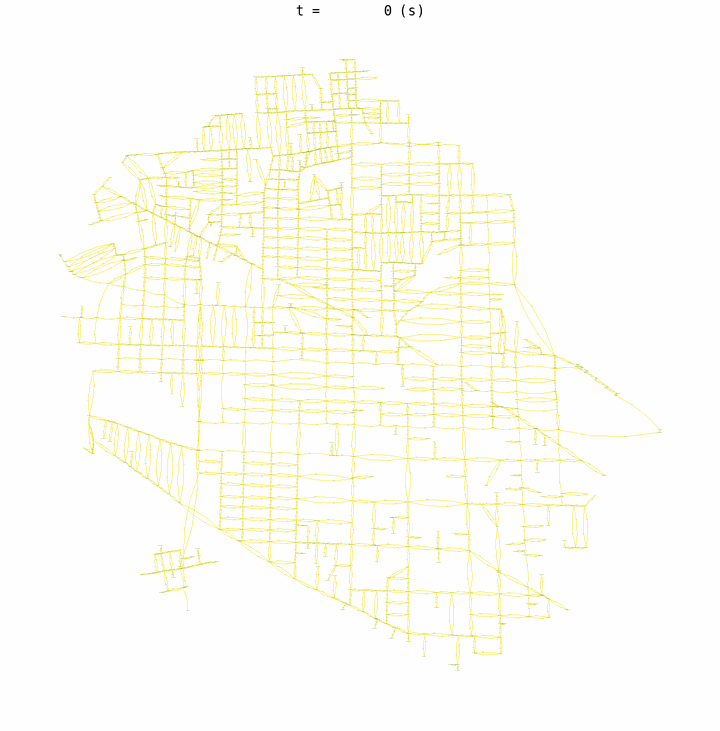

In [14]:
from IPython.display import display, Image
with open("outsavia/anim_network0.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))